In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

In [3]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [4]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [6]:
df.shape

(74283, 25)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df.drop(columns='Education Level',inplace=True)

In [9]:
df.shape

(74283, 24)

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

for col in categorical_cols:
    print(f"Value counts for column: {col}\n")
    print(df[col].value_counts(), "\n" + "-"*40 + "\n")  # Display counts for each unique value


Value counts for column: Country

Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Gender

Gender
Female    37249
Male      37034
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Physical Activity Level

Physical Activity Level
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64 
----------------------------------------

Value counts for column: Smoking Status

Smoking Status
Current    24915
Never      24740
Former     24628
Name: count, dtype: int64 
---

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns
categorical_cols

Index(['Country', 'Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
       'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Urban vs Rural Living', 'Alzheimer’s Diagnosis'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Alzheimer’s Diagnosis']),df['Alzheimer’s Diagnosis'], test_size=0.2)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((59426, 23), (14857, 23), (59426,), (14857,))

In [14]:
# List of nominal and ordinal columns as previously defined
nominal_columns = [
    'Country', 'Gender', 'Smoking Status', 'Alcohol Consumption', 'Diabetes','Hypertension',
    'Family History of Alzheimer’s', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
    'Urban vs Rural Living'
]

ordinal_columns = [
    'Physical Activity Level', 'Cholesterol Level', 'Depression Level', 'Sleep Quality', 'Dietary Habits',
    'Air Pollution Exposure', 'Social Engagement Level', 'Income Level', 'Stress Levels'
]


In [15]:
# Define the categories for each ordinal feature
category_orders = [
    ['Low','Medium','High'], 
    ['Normal', 'High'],        
    ['Low','Medium','High'],  
    ['Poor','Average','Good'],  
    ['Unhealthy', 'Average', 'Healthy'],  
    ['Low','Medium','High'],  
    ['Low','Medium','High'], 
    ['Low','Medium','High'],  
    ['Low','Medium','High'],  
]

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [17]:
transformer = ColumnTransformer(
    transformers=[
        ('tnf1',OrdinalEncoder(categories=category_orders),ordinal_columns),
        ('tnf2',OneHotEncoder(sparse_output=False,drop='first'),nominal_columns)
    ],remainder='passthrough'
)

In [18]:
X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded = transformer.transform(X_test)

In [19]:
X_train_encoded.shape , X_test_encoded.shape

((59426, 45), (14857, 45))

In [20]:
y_train_en = pd.get_dummies(y_train, drop_first=True,dtype=int)
y_test_en = pd.get_dummies(y_test, drop_first=True,dtype=int)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
model = LogisticRegression(solver='saga', max_iter=1000)

In [23]:
model.fit(X_train_encoded,y_train_en.values.ravel())

LogisticRegression(max_iter=1000, solver='saga')

In [24]:
y_pred = model.predict(X_test_encoded)

In [25]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [26]:
# 8️⃣ Evaluate Model
accuracy = accuracy_score(y_test_en, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [27]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test_en, y_pred)
cm

array([[6818, 1796],
       [2438, 3805]], dtype=int64)

In [28]:
print("\nClassification Report:\n", classification_report(y_test_en, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      8614
           1       0.68      0.61      0.64      6243

    accuracy                           0.72     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.72      0.71     14857



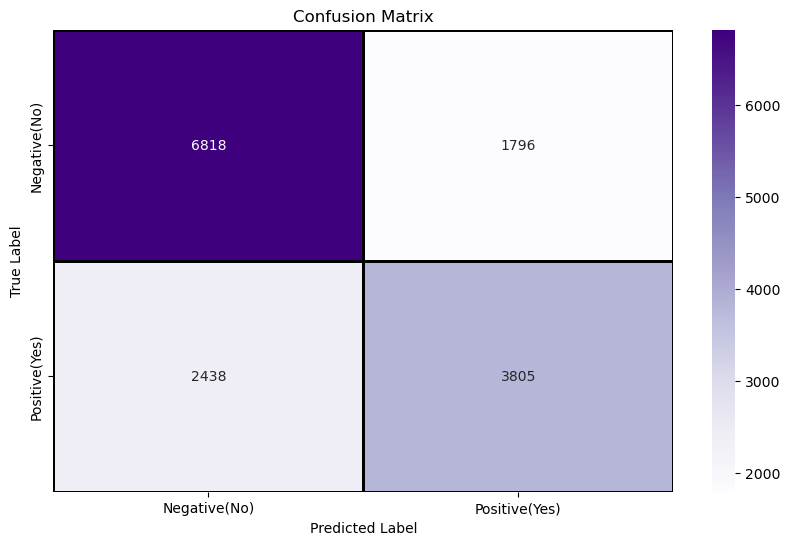

In [29]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
            xticklabels=['Negative(No)', 'Positive(Yes)'], 
            yticklabels=['Negative(No)', 'Positive(Yes)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
# # Get precision-recall values
# precision, recall, thresholds = precision_recall_curve(y_test_en, model.decision_function(X_test_encoded))

# # Plot Precision-Recall Curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, marker='o', linestyle='-', color='b', label="Precision-Recall Curve")

# # Labels and Title
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve")
# plt.legend()
# plt.grid()

# # Show plot
# plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from joblib import parallel_backend
# Define classifiers with improved parameters
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="saga"),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Support Vector Machine": SVC(kernel="rbf", C=1.0)
}

# Train and evaluate each model
results = {}
for name, clf in classifiers.items():
    print("model use :",name)
    with parallel_backend("threading"):
        clf.fit(X_train_encoded, y_train_en.values.ravel())
    y_pred = clf.predict(X_test_encoded)
    accuracy = accuracy_score(y_test_en, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_en, y_pred))
    print("-" * 50)

# Find the best model
best_model = max(results, key=results.get)
print(f"Best model: {best_model} with accuracy {results[best_model]:.4f}")

model use : Logistic Regression
Logistic Regression Accuracy: 0.7150
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      8614
           1       0.68      0.61      0.64      6243

    accuracy                           0.72     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.72      0.71     14857

--------------------------------------------------
model use : Random Forest
Random Forest Accuracy: 0.7230
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      8614
           1       0.68      0.65      0.66      6243

    accuracy                           0.72     14857
   macro avg       0.72      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857

--------------------------------------------------
model use : K-Nearest Neighbors


C:\Users\parvez\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\parvez\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\parvez\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\parvez\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\parvez\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

K-Nearest Neighbors Accuracy: 0.6536
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      8614
           1       0.60      0.54      0.57      6243

    accuracy                           0.65     14857
   macro avg       0.64      0.64      0.64     14857
weighted avg       0.65      0.65      0.65     14857

--------------------------------------------------
model use : Decision Tree
Decision Tree Accuracy: 0.7172
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      8614
           1       0.66      0.69      0.67      6243

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857

--------------------------------------------------
model use : Support Vector Machine
Support Vector Machine Accuracy: 0.7072
              precision    recall  f1-score   support

           0       0

In [ ]:
!pip install --upgrade joblib